<a href="https://colab.research.google.com/github/surajslab/PandasPractice_CovidDataset/blob/main/PandasLesson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Reference : https://www.youtube.com/watch?v=MMirDY9AUEg&list=PLyMom0n-MBrpzC91Uo560S4VbsiLYtCwo&index=5

# Analyzing Tabular Data using Python and Pandas

![](https://i.imgur.com/zfxLzEv.png)




In [1]:
from urllib.request import urlretrieve

In [2]:
url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'

urlretrieve(url, "dataset.csv")

('dataset.csv', <http.client.HTTPMessage at 0x7f945cfee710>)

In [3]:
import pandas as pd

In [47]:
raw_df= pd.read_csv("dataset.csv")

In [5]:
raw_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        248 non-null    object 
 1   new_cases   248 non-null    float64
 2   new_deaths  248 non-null    float64
 3   new_tests   135 non-null    float64
dtypes: float64(3), object(1)
memory usage: 7.9+ KB


In [7]:
raw_df.describe()

,new_cases,new_deaths,new_tests
count,248.000000,248.000000,135.000000
mean,1094.818548,143.133065,31699.674074
std,1554.508002,227.105538,11622.209757
min,-148.000000,-31.000000,7841.000000
25%,123.000000,3.000000,25259.000000
50%,342.000000,17.000000,29545.000000
75%,1371.750000,175.250000,37711.000000
max,6557.000000,971.000000,95273.000000


In [8]:
raw_df.columns

Index(['date', 'new_cases', 'new_deaths', 'new_tests'], dtype='object')

In [9]:
raw_df.shape

(248, 4)

#### Gets the data from specific row and column

In [10]:
raw_df.at[223,"new_cases"]

463.0

#### Gets the data from specific row 

In [11]:
raw_df.loc[246].tolist()

['2020-09-02', 975.0, 8.0, nan]

#### Gets the data from multiple columns

In [12]:
raw_df[['new_cases','new_deaths','new_tests']]

,new_cases,new_deaths,new_tests
0,0.0,0.0,NaN
1,0.0,0.0,NaN
2,0.0,0.0,NaN
3,0.0,0.0,NaN
4,0.0,0.0,NaN
...,...,...,...
243,1444.0,1.0,53541.0
244,1365.0,4.0,42583.0
245,996.0,6.0,54395.0
246,975.0,8.0,NaN


In [13]:
raw_df.new_tests.first_valid_index()

111

### The change of NANs to valid data can be seen.  

In [14]:
raw_df.loc[108:113]

,date,new_cases,new_deaths,new_tests
108,2020-04-17,3786.0,525.0,NaN
109,2020-04-18,3493.0,575.0,NaN
110,2020-04-19,3491.0,480.0,NaN
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
113,2020-04-22,2729.0,534.0,44248.0


## Analyzing the Data Frame

In [15]:
raw_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


In [19]:
total_deaths = raw_df.new_deaths.sum()
total_cases  = raw_df.new_cases.sum()

print(f"The total number of cases is {total_cases} and total number of cases is {total_deaths }")

The total number of cases is 271515.0 and total number of cases is 35497.0


In [30]:
death_ratio = total_deaths/total_cases


f'{death_ratio*100:.2f} %'

'13.07 %'

## Querying and Sorting Rows

### Taking the cases which is only above 1000

In [32]:
high_cases =  raw_df.new_cases>1000

In [33]:
high_cases

0      False
1      False
2      False
3      False
4      False
       ...  
243     True
244     True
245    False
246    False
247     True
Name: new_cases, Length: 248, dtype: bool

In [36]:
raw_df[high_cases]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


It can be done in a oneliner

In [37]:
raw_df[raw_df.new_cases>1000]

,date,new_cases,new_deaths,new_tests
68,2020-03-08,1247.0,36.0,NaN
69,2020-03-09,1492.0,133.0,NaN
70,2020-03-10,1797.0,98.0,NaN
72,2020-03-12,2313.0,196.0,NaN
73,2020-03-13,2651.0,189.0,NaN
...,...,...,...,...
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0


In [38]:
total_tests = raw_df.new_tests.sum()
total_cases = raw_df.new_cases.sum()

**To find the positive rate ,i.e the number of cases that came out to be positive out of the total tests taken**

In [39]:
positive_rate= total_cases/total_tests
positive_rate

0.06344614829548428

In [42]:
high_df=raw_df[ raw_df.new_cases/raw_df.new_tests > positive_rate]

In [43]:
high_df

,date,new_cases,new_deaths,new_tests
111,2020-04-20,3047.0,433.0,7841.0
112,2020-04-21,2256.0,454.0,28095.0
114,2020-04-23,3370.0,437.0,37083.0
116,2020-04-25,3021.0,420.0,38676.0
117,2020-04-26,2357.0,415.0,24113.0
118,2020-04-27,2324.0,260.0,26678.0
124,2020-05-03,1900.0,474.0,27047.0
128,2020-05-07,1444.0,369.0,13665.0


In [48]:
raw_df['positive_rate']= raw_df.new_cases/raw_df.new_tests

In [49]:
raw_df

,date,new_cases,new_deaths,new_tests,positive_rate
0,2019-12-31,0.0,0.0,NaN,NaN
1,2020-01-01,0.0,0.0,NaN,NaN
2,2020-01-02,0.0,0.0,NaN,NaN
3,2020-01-03,0.0,0.0,NaN,NaN
4,2020-01-04,0.0,0.0,NaN,NaN
...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,0.026970
244,2020-08-31,1365.0,4.0,42583.0,0.032055
245,2020-09-01,996.0,6.0,54395.0,0.018311
246,2020-09-02,975.0,8.0,NaN,NaN


In [53]:
raw_df.drop(columns=['positive_rate'],inplace=True)

In [54]:
raw_df

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN
...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0
244,2020-08-31,1365.0,4.0,42583.0
245,2020-09-01,996.0,6.0,54395.0
246,2020-09-02,975.0,8.0,NaN


## Sorting values

In [55]:
raw_df.sort_values("new_tests",ascending=False).head(10)

,date,new_cases,new_deaths,new_tests
115,2020-04-24,2646.0,464.0,95273.0
241,2020-08-28,1409.0,5.0,65135.0
242,2020-08-29,1460.0,9.0,64294.0
239,2020-08-26,876.0,4.0,58054.0
240,2020-08-27,1366.0,13.0,57640.0
245,2020-09-01,996.0,6.0,54395.0
243,2020-08-30,1444.0,1.0,53541.0
233,2020-08-20,642.0,7.0,49662.0
236,2020-08-23,1071.0,3.0,47463.0
235,2020-08-22,947.0,9.0,46613.0


In [56]:
raw_df.sort_values("new_cases",ascending=True).head(10)

,date,new_cases,new_deaths,new_tests
172,2020-06-20,-148.0,47.0,29875.0
0,2019-12-31,0.0,0.0,NaN
29,2020-01-29,0.0,0.0,NaN
30,2020-01-30,0.0,0.0,NaN
32,2020-02-01,0.0,0.0,NaN
33,2020-02-02,0.0,0.0,NaN
34,2020-02-03,0.0,0.0,NaN
36,2020-02-05,0.0,0.0,NaN
37,2020-02-06,0.0,0.0,NaN
38,2020-02-07,0.0,0.0,NaN


In [57]:
raw_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,-148.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


In [62]:
raw_df.at[172, 'new_cases']= (raw_df.at[171, 'new_cases']+raw_df.at[173, 'new_cases'])//2

In [63]:
raw_df.loc[169:175]

,date,new_cases,new_deaths,new_tests
169,2020-06-17,210.0,34.0,33957.0
170,2020-06-18,328.0,43.0,32921.0
171,2020-06-19,331.0,66.0,28570.0
172,2020-06-20,297.0,47.0,29875.0
173,2020-06-21,264.0,49.0,24581.0
174,2020-06-22,224.0,24.0,16152.0
175,2020-06-23,221.0,23.0,23225.0


## Working with date time

In [64]:
raw_df['date']

0      2019-12-31
1      2020-01-01
2      2020-01-02
3      2020-01-03
4      2020-01-04
          ...    
243    2020-08-30
244    2020-08-31
245    2020-09-01
246    2020-09-02
247    2020-09-03
Name: date, Length: 248, dtype: object

In [65]:
raw_df['date'] = pd.to_datetime(raw_df['date'])

In [66]:
raw_df['date']

0     2019-12-31
1     2020-01-01
2     2020-01-02
3     2020-01-03
4     2020-01-04
         ...    
243   2020-08-30
244   2020-08-31
245   2020-09-01
246   2020-09-02
247   2020-09-03
Name: date, Length: 248, dtype: datetime64[ns]

In [69]:
raw_df['year'] = pd.DatetimeIndex(raw_df['date']).year
raw_df['month'] = pd.DatetimeIndex(raw_df['date']).month
raw_df['day'] = pd.DatetimeIndex(raw_df['date']).day
raw_df['weekday'] = pd.DatetimeIndex(raw_df['date']).weekday


In [70]:
raw_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


## Querying only the month "may" data

In [77]:
month_may_data= raw_df[raw_df['month']==5].copy()
month_may_data

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
122,2020-05-01,1872.0,285.0,43732.0,2020,5,1,4
123,2020-05-02,1965.0,269.0,31231.0,2020,5,2,5
124,2020-05-03,1900.0,474.0,27047.0,2020,5,3,6
125,2020-05-04,1389.0,174.0,22999.0,2020,5,4,0
126,2020-05-05,1221.0,195.0,32211.0,2020,5,5,1
127,2020-05-06,1075.0,236.0,37771.0,2020,5,6,2
128,2020-05-07,1444.0,369.0,13665.0,2020,5,7,3
129,2020-05-08,1401.0,274.0,45428.0,2020,5,8,4
130,2020-05-09,1327.0,243.0,36091.0,2020,5,9,5
131,2020-05-10,1083.0,194.0,31384.0,2020,5,10,6


In [81]:
may_data= month_may_data[['new_cases', 'new_deaths', 'new_tests']]
may_data

,new_cases,new_deaths,new_tests
122,1872.0,285.0,43732.0
123,1965.0,269.0,31231.0
124,1900.0,474.0,27047.0
125,1389.0,174.0,22999.0
126,1221.0,195.0,32211.0
127,1075.0,236.0,37771.0
128,1444.0,369.0,13665.0
129,1401.0,274.0,45428.0
130,1327.0,243.0,36091.0
131,1083.0,194.0,31384.0


In [79]:
may_data.sum()

new_cases     29073.0
new_deaths     5658.0
new_cases     29073.0
dtype: float64

## Groupby And Aggregation

In [80]:
month_wise=raw_df.groupby('month')

In [82]:
month_wise_data=month_wise[['new_cases','new_deaths','new_tests']].sum()

In [83]:
month_wise_data

,new_cases,new_deaths,new_tests
month,,,
1,3.0,0.0,0.0
2,885.0,21.0,0.0
3,100851.0,11570.0,0.0
4,101852.0,16091.0,419591.0
5,29073.0,5658.0,1078720.0
6,8217.0,1404.0,830354.0
7,6722.0,388.0,797692.0
8,21060.0,345.0,1098704.0
9,3297.0,20.0,54395.0


## Writing Data Back to Files

In [84]:
raw_df

,date,new_cases,new_deaths,new_tests,year,month,day,weekday
0,2019-12-31,0.0,0.0,NaN,2019,12,31,1
1,2020-01-01,0.0,0.0,NaN,2020,1,1,2
2,2020-01-02,0.0,0.0,NaN,2020,1,2,3
3,2020-01-03,0.0,0.0,NaN,2020,1,3,4
4,2020-01-04,0.0,0.0,NaN,2020,1,4,5
...,...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30,6
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31,0
245,2020-09-01,996.0,6.0,54395.0,2020,9,1,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2,2


In [91]:
result_df = raw_df[['date','new_cases','new_deaths','new_tests','year','month','day']]

In [92]:
result_df

,date,new_cases,new_deaths,new_tests,year,month,day
0,2019-12-31,0.0,0.0,NaN,2019,12,31
1,2020-01-01,0.0,0.0,NaN,2020,1,1
2,2020-01-02,0.0,0.0,NaN,2020,1,2
3,2020-01-03,0.0,0.0,NaN,2020,1,3
4,2020-01-04,0.0,0.0,NaN,2020,1,4
...,...,...,...,...,...,...,...
243,2020-08-30,1444.0,1.0,53541.0,2020,8,30
244,2020-08-31,1365.0,4.0,42583.0,2020,8,31
245,2020-09-01,996.0,6.0,54395.0,2020,9,1
246,2020-09-02,975.0,8.0,NaN,2020,9,2


In [93]:
result_df.to_csv('data.csv', index=None)

## Ploting with Pandas

In [99]:
result_df.set_index('date', inplace=True)

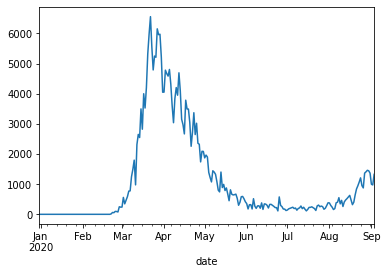

In [101]:
result_df.new_cases.plot()

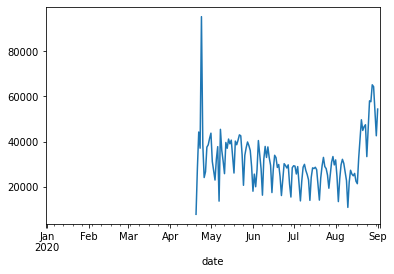

In [102]:
result_df.new_tests.plot()

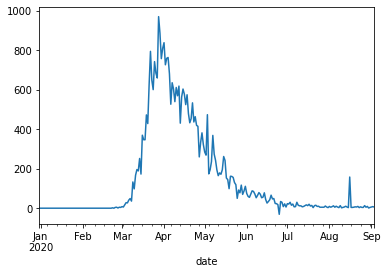

In [103]:
result_df.new_deaths.plot()